In [2]:
import json
import requests
from matplotlib import pyplot
import datetime
import numpy

In [3]:
# Getting json data from the api

stateData = requests.get("https://api.covid19india.org/v4/timeseries.json").content
with open('state.json', 'wb') as fw:
    fw.write(stateData)

In [4]:
# Filtering data for a state
bihar_data = json.loads(stateData)['BR']

#last_date = bihar_data['dates'][previous_date]
date = lambda x:(datetime.datetime.today() - datetime.timedelta(days=x)).strftime('%Y-%m-%d')
previous_date = str(date(1))
last_update = bihar_data['dates'][previous_date]['delta']
total_summary = bihar_data['dates'][previous_date]['total']

""" fields are : 
    But fields are only there when they correspond to some data
for last date - "confirmed", "deceased", "recovered", "tested"
for total - "confirmed", "deceased", "migrated", "recovered", "tested"
"""

# Getting data of last one week:
last_week = [date(x) for x in range(1,8)]
last_week.reverse()
last_week_update = [bihar_data['dates'][x]['delta'] for x in last_week]
#last_week_totals = [bihar_data['dates'][x]['total'] for x in last_week]
tested_w = [x['tested'] for x in last_week_update]
confirmed_w = [x['confirmed'] for x in last_week_update]
deceased_w = [x['deceased'] for x in last_week_update]
recovered_w = [x['recovered'] for x in last_week_update]
dates_last_week = [x[-5:] for x in last_week]

# All the vaiables to be used on plots
labels = ('Tested', 'Confirmed', 'Deceased', 'Recovered')
colors = ('blue', 'orange', 'red', 'green')
variables = (tested_w, confirmed_w, deceased_w, recovered_w)

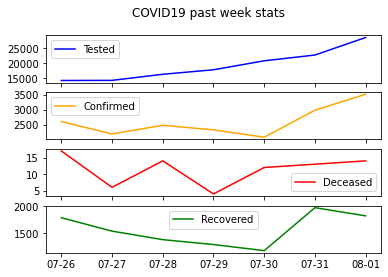

In [25]:
# Ploting lastweek data
#pyplot.plot(last_week, deceased_w )

#Linear plot for last 7 days
fig, axs = pyplot.subplots(4, sharex = True)
fig.suptitle('COVID19 past week stats')
for i in range(len(labels)):
    axs[i].plot(dates_last_week, variables[i], label=labels[i], color=colors[i])
    axs[i].legend(loc='best')
pyplot.show()   

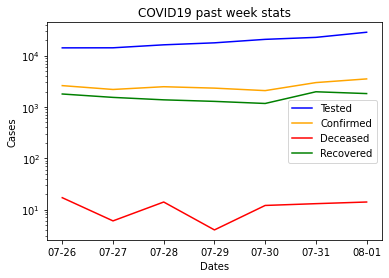

In [24]:
# All data on a single plot
fig, ax = pyplot.subplots()

for i in range(len(labels)):
    ax.plot(dates_last_week, variables[i], label=labels[i], color=colors[i])
    ax.legend(loc='best')
    
ax.set_xlabel("Dates")
ax.set_ylabel("Cases")
ax.set_yscale('log')
ax.set_title("COVID19 past week stats")
pyplot.show()

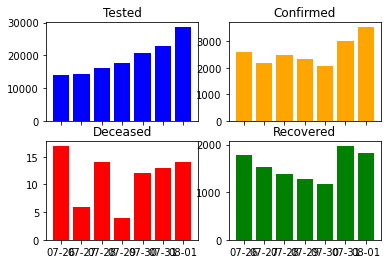

In [7]:
# Bar chart

fig, axs = pyplot.subplots(2,2, sharex=True)
for (i,j), _ in numpy.ndenumerate(axs):
    bar = axs[i][j].bar(dates_last_week, variables[i*2+j], color=colors[i*2+j])
    axs[i][j].set_title(labels[i*2+j])
    
pyplot.show()

In [8]:
"""
Analysing the last week against the total cases for better understanding of whether we are improving or not
"""

before_last_week = bihar_data['dates'][date(8)]['total']
tested_in_lw = total_summary['tested'] - before_last_week['tested']
confirmed_in_lw = total_summary['confirmed'] - before_last_week['confirmed']
deceased_in_lw = total_summary['deceased'] - before_last_week['deceased']
recovered_in_lw = total_summary['recovered'] - before_last_week['recovered']

total_lw = [tested_in_lw, confirmed_in_lw, deceased_in_lw, recovered_in_lw]
total_now = [total_summary['tested'], total_summary['confirmed'], total_summary['deceased'], total_summary['recovered']]
total_lw

[134671, 18194, 80, 10953]

<Figure size 720x1080 with 0 Axes>

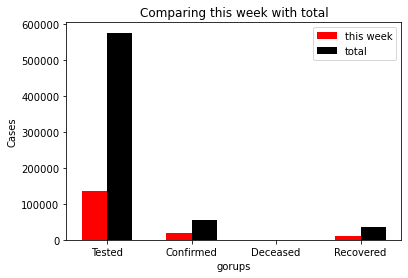

In [54]:
# Bar chart
N = 4

# Position of bars on x-axis
ind = numpy.arange(N)
# Width of a bar 
width = 0.3 
pyplot.figure(figsize=(10,15))
fig, ax = pyplot.subplots()
ax.bar(ind,  total_lw, width, label='this week', color='red')
ax.bar(ind + width, total_now, width, label='total', color='black')
ax.set_title("Comparing this week with total")
ax.set_ylabel("Cases")
ax.set_xlabel("gorups")
pyplot.xticks(ind + width / 2, labels)
ax.legend(loc='best')
pyplot.show()

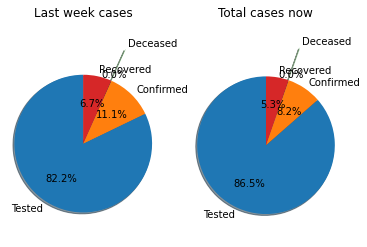

In [46]:
# Pie chart
explode = (0, 0, 0.5, 0)
#pyplot.figure(figsize=(10,15))
fig, axs = pyplot.subplots(1,2)
axs[0].pie(total_lw, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')
axs[0].set_title("Last week cases")
axs[1].pie(total_now, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')
axs[1].set_title("Total cases now")
pyplot.show()

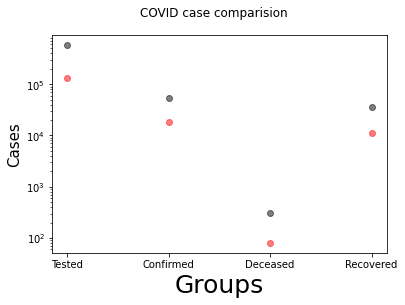

In [55]:
# Scatter plot
fig, ax = pyplot.subplots()
ax.scatter(labels, total_lw, alpha=0.5, color='red')
ax.scatter(labels, total_now, alpha=0.5, color='black')
ax.set_yscale('log')
ax.set_xlabel(r'Groups', fontsize=25)
ax.set_ylabel(r'Cases', fontsize=15)
fig.suptitle('COVID case comparision')
pyplot.show()